#### Task 1 : Implement integration over a rectangular domain with a double Legendre quadrature

In [1]:
import numpy as np
from scipy.integrate import dblquad, tplquad,nquad
import sobol_seq
import matplotlib.pyplot as plt
import random

In [2]:
# Definition of function: integrate function (2x + y) over rectangular domain [0,2]* [2,3]

In [3]:
def f(x,y):
    return 2*x + y 

a,b = 0, 2 
c,d = 2, 3
nx= 5 ; ny= 5 # number of intervals

In [4]:
def center_double(f,a,b,c,d,nx,ny):
    hx = (b-a) / nx # length of each interval on x-axis
    hy = (d-c) / ny # length of each interval on y-axis
    I =0 
    for i in range(nx):
        for j in range(ny):
            xi = a + hx/2 + i*hx
            yi = c + hy/2 + j*hy
            I += hx*hy*f(xi,yi)
    return I
center_double(f,a,b,c,d,nx,ny)

9.000000000000005

In [5]:
# calculation of integral using library function dblquad
exact = dblquad(f,2,3, lambda x:0,lambda x:2)[0]

print ('exact:', exact)
print ('Computed integral:',center_double(f,a,b,c,d,nx,ny))

exact: 9.0
Computed integral: 9.000000000000005


#### Task 2 : Implement integration over a trangular domain with a mixed Legendre/Jacobi quadrature

#### Task 3 : Use the Sobol sequence to calculate the value of
$$
\iint\limits_D e^{-(x^2 + y^2)} \, dx\, dy  \;,
$$


In [6]:
def func(x, y):
    r2 = x**2 + y**2
    return np.exp(-r2)

In [7]:
exact = dblquad(func,0,1, lambda x:0,lambda x:1)

In [8]:
exact

(0.5577462853510337, 8.291374381535408e-15)

In [14]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib notebook

In [65]:
def inside(x,y, r):
    return x * y < r

<IPython.core.display.Javascript object>


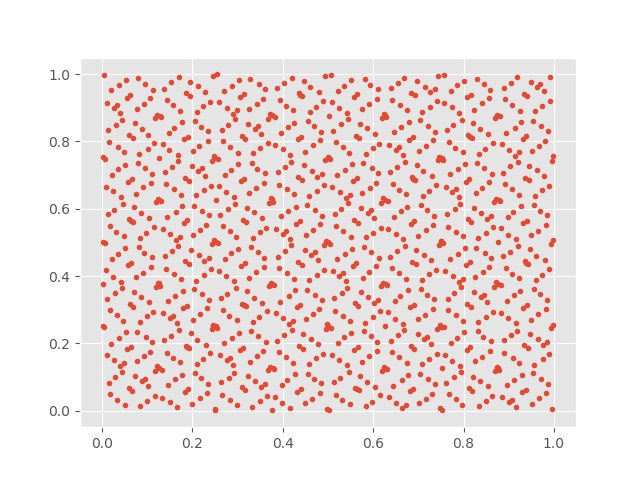

In [80]:
N = 1070
x = sobol_seq.i4_sobol_generate(2, N) 

fig, ax = plt.subplots()
ax.plot(x[:, 0], x[:, 1], 'o', label = "N = %s" % N, ms=4, mec='none')
ax.set_aspect('auto')



In [88]:
def sample(N, r=1):
    N = int(N)
    x = sobol_seq.i4_sobol_generate(2, N)
    y = sobol_seq.i4_sobol_generate(2, N)
    accepted = inside(x ,y, r)
    denom = accepted.sum()
    return np.sum(func(x[accepted],y[accepted])/ N) , denom

In [89]:
for n in [100, 1000, 10000]:
    res = sample(n)
    err = res[0] - exact[0]
    print("%8d  %.7g  %.7g %g" % (n, res[0], exact[0], err))

     100  1.199209  0.5577463 0.641462
    1000  1.196696  0.5577463 0.63895
   10000  1.196411  0.5577463 0.638664
